In [2]:
import pandas as pd
import shap
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("/Users/sudhanvasavyasachi/Desktop/Projects/hackathon/Data/stratified_sample.csv")

In [6]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,21.540788,10.059654,8.214383,4.679882,10.280525,4.115453,-4.595460,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0
1,16.817444,10.059654,8.727821,3.907662,10.280525,4.115453,-5.987667,4.833815,3.863287,13.190056,5.300375,-0.168679,0,0,0,0
2,13.882037,10.059654,8.214383,3.907662,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0
3,22.992071,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0
4,22.390426,10.059654,8.214383,4.679882,10.280525,4.115453,-2.411115,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0


In [7]:
X=df.drop(['conversion','visit'],axis=1)
y=df['conversion']

In [8]:
from sklearn.model_selection import train_test_split

# Split the data with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the shapes to verify the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (90000, 14)
Testing set shape: (10000, 14)
Training labels shape: (90000,)
Testing labels shape: (10000,)


In [9]:
# Split training data into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Final training set shape:", X_train_final.shape)
print("Validation set shape:", X_val.shape)
print("Final training labels shape:", y_train_final.shape) 
print("Validation labels shape:", y_val.shape)

Final training set shape: (81000, 14)
Validation set shape: (9000, 14)
Final training labels shape: (81000,)
Validation labels shape: (9000,)


In [10]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Create and train the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',  # Use 'multi:softprob' for multiclass
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = model.predict(X_val)

# Print classification report
print(classification_report(y_val, y_pred))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:56:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8976
           1       1.00      0.54      0.70        24

    accuracy                           1.00      9000
   macro avg       1.00      0.77      0.85      9000
weighted avg       1.00      1.00      1.00      9000



In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and fit Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Fit on training data
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred_rf = rf.predict(X_val)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8976
           1       1.00      0.42      0.59        24

    accuracy                           1.00      9000
   macro avg       1.00      0.71      0.79      9000
weighted avg       1.00      1.00      1.00      9000



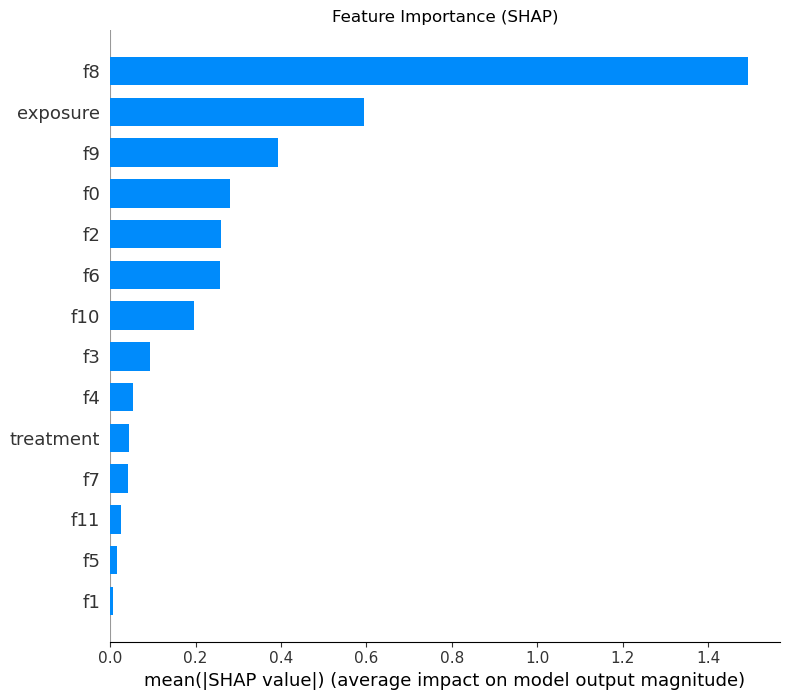

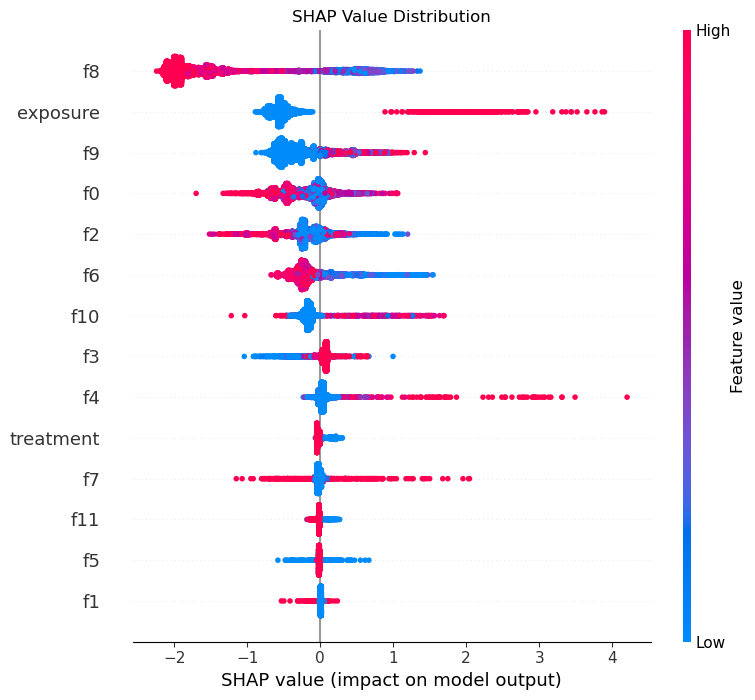

In [12]:
# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

# Create summary plot
shap.summary_plot(shap_values, X_val, plot_type="bar", show=False)
plt.title("Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

# Create detailed summary plot with all features
shap.summary_plot(shap_values, X_val, show=False)
plt.title("SHAP Value Distribution")
plt.tight_layout()
plt.show()

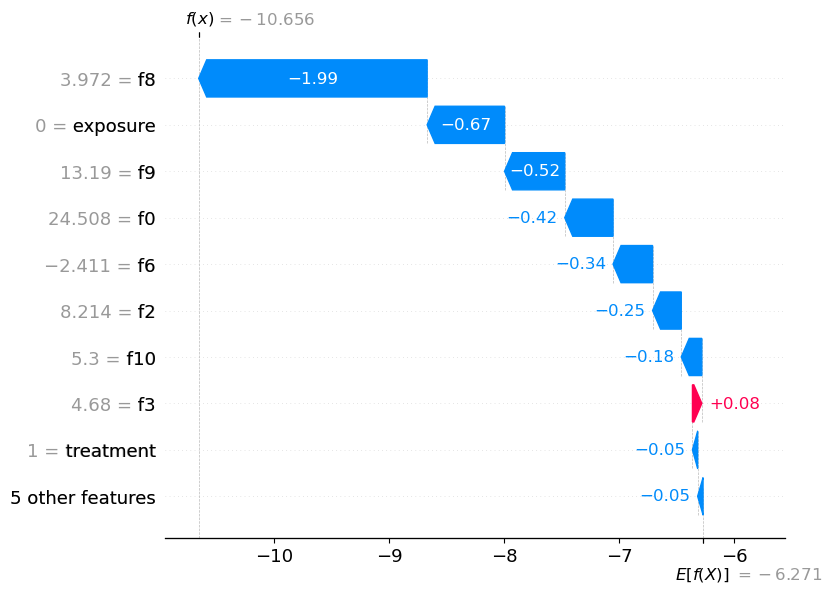

In [13]:
import shap

# Create waterfall plot for a single prediction

# Get SHAP values for the first instance in validation set
instance_index = 100
instance = X_val.iloc[instance_index:instance_index+1]

# Calculate SHAP values for this instance
explainer = shap.TreeExplainer(model)
shap_values_single = explainer.shap_values(instance)

# Create the waterfall plot
shap.plots.waterfall(shap.Explanation(
    values=shap_values_single[0],
    base_values=explainer.expected_value,
    data=instance.iloc[0],
    feature_names=X_val.columns
))


In [15]:
import pickle
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [16]:
model.classes_

array([0, 1])